In [1]:
import pandas as pd
import requests
import json
import xlwings as xw
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:

excel_input="C:/Users/Eduar/Desktop/Input_file.xlsx"
df_input=pd.read_excel(excel_input, sheet_name=0)
n =8760
additional_columns = [f'col_{i}' for i in range(1, n +1 )]
columns = ['name'] + additional_columns
df = pd.DataFrame(columns=columns)
data_list =[]


In [3]:
df_out=df_input.drop(['lat', 'lon', 'Biomass Potential'], axis=1)
df_out.loc[:, 'Hydrogen']=0
df_out.loc[:, 'E_Methanol']=0
df_out.loc[:, 'Bio_Methanol']=0
df_out.loc[:, 'Bio_E_Methanol']=0
df_out.loc[:, 'Peak Value']=0
df_out.loc[:, 'Factor']=0
df_out.loc[:, 'Feedstock_price']=0

df_out.loc[:, 'PV Capex %H']=0
df_out.loc[:, 'Battery Capex %H']=0
df_out.loc[:, 'Electrolizer Capex %H']=0

df_out.loc[:, 'PV Capex %E']=0
df_out.loc[:, 'Battery Capex %E']=0
df_out.loc[:, 'Electrolizer Capex %E']=0
df_out.loc[:, 'Captured CO2 %E']=0


df_out.loc[:, 'Digestor Capex %B']=0
df_out.loc[:, 'Methanol Capex %B']=0
df_out.loc[:, 'Feedstsck %B']=0

df_out.loc[:, 'Methanol Capex %B_E']=0
df_out.loc[:, 'Feedstsck %B_E']=0
df_out.loc[:, 'Additional H2 %B_E']=0


df_out.loc[:, 'ElectrolyzerUse']=0


df_out

,divipola_n,name,year,Hydrogen,E_Methanol,Bio_Methanol,Bio_E_Methanol,Peak Value,Factor,Feedstock_price,...,Battery Capex %E,Electrolizer Capex %E,Captured CO2 %E,Digestor Capex %B,Methanol Capex %B,Feedstsck %B,Methanol Capex %B_E,Feedstsck %B_E,Additional H2 %B_E,ElectrolyzerUse
0,15,Boyaca,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,Boyaca,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,Boyaca,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,Cordoba,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,Cordoba,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,Amazonas,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,91,Amazonas,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,91,Amazonas,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,88,San Andres,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
for index, row in df_input.iterrows():
    state = row['name']
    params = {
    'lat': row['lat'],  # Latitude 
    'lon': row['lon'], 
    'radiation database' : 'PVGIS-ERA5', # Database
    'startyear': row['year'],  # Retrieve data for year
    'endyear': row['year'],
    'pvcalculation': 0,  # No PV calculation, only solar data
    'trackingtype' : 2, #Added by me
    
    'optimalinclination' : 1, # Added by me
    'optimalangles': 1,  # Include optimal angles in results
    'outputformat': 'json'
    }
    # Endpoint URL for the PVGIS TMY (Typical Meteorological Year) data
    url = "https://re.jrc.ec.europa.eu/api/seriescalc"
    
    # Send the GET request to the PVGIS API
    response = requests.get(url, params=params)
    #time.sleep(2)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        data_list.append(data)
        
    else:
        print("Error:", response.status_code, response.text)
        print("The Department :", state, " failed")
    

    

In [5]:
with open('C:/Users/Eduar/Desktop/jsonStructure.json', 'w') as json_file:
    json.dump(data_list[0], json_file, indent=4)


In [6]:

for index, item in enumerate(data_list):
    
    df2= pd.DataFrame(data_list[index]['outputs']['hourly'])
    df2['month'] = df2['time'].str[4:6]
    df2['monthday'] = df2['time'].str[4:8]
    df3 = df2
    #print("The index is", index)
    value = df_out.loc[ index, 'name']
    filename = f'C:/Users/Eduar/Desktop/DownloadedInfo/department_{index}_{value}.json'
    df2.to_json(filename, orient='records', lines=True)
    #print("The value is ", value)
    combined_series = pd.concat([ pd.Series([value]),df3['G(i)'] ], ignore_index=True)
    transposed_row= combined_series.to_frame().T
    transposed_row.columns = columns
    df = pd.concat([df, transposed_row], ignore_index=True)
    

In [7]:
# Load the existing Excel workbook
#excel_file = "C:/Users/Eduar/PycharmProjects/TestProjekt/GIS 2/Solar/changedinput.xlsx"
excel_file = "C:/Users/Eduar/Desktop/Thesis EBH V12.xlsx"
wb = xw.Book(excel_file)
sheet = wb.sheets["Hydrogen yield"]
counter=0

howmany = input('How many times? ')

for row_index, row in df.iterrows():
    
    if row_index < int(howmany):
            
        for i, value in row.items():  # Writing from F86 'Title until full
            if counter!=0:
                sheet.range(f'F{counter+86}').value = row[i]
            counter +=1
        counter=0
             
        wb.app.calculate()
            
        df_out.loc[row_index, 'Peak Value'] = sheet.range('C3').value
        df_out.loc[row_index, 'Factor'] = sheet.range('C21').value
        
        range_address = 'B26:F46'
        # Read the range into a DataFrame
        df_min = sheet[range_address].options(pd.DataFrame, index=False, header=False).value
        # Process the DataFrame to set the first row as headers and the first column as the index
        df_min.columns = df_min.iloc[0]  # Set the first row as the column names
        df_min = df_min[1:]              # Remove the first row which is now the header
        df_min.set_index(df_min.columns[0], inplace=True)  # Set the first column as the index
        min_row, min_column = df_min.stack().idxmin() 
        
        # Print results
        print(f"Located at: Row '{min_row}', Column '{min_column}'")
        # print(df_min)
              
        sheet.range('C10').value = min_row
        sheet.range('C54').value = min_column
        wb.app.calculate()
        
        df_out.loc[row_index, 'Hydrogen'] = sheet.range('C80').value
        df_out.loc[row_index, 'E_Methanol'] = sheet.range('C81').value
        
        df_out.loc[row_index, 'PV Capex %H'] = sheet.range('X69').value*100
        df_out.loc[row_index, 'Battery Capex %H'] = sheet.range('X70').value*100
        df_out.loc[row_index, 'Electrolizer Capex %H'] = sheet.range('X71').value*100

        df_out.loc[row_index, 'PV Capex %E'] = sheet.range('Y69').value*100
        df_out.loc[row_index, 'Battery Capex %E'] = sheet.range('Y70').value*100
        df_out.loc[row_index, 'Electrolizer Capex %E'] = sheet.range('Y71').value*100
        df_out.loc[row_index, 'Captured CO2 %E'] = sheet.range('Y78').value*100
        df_out.loc[row_index, 'ElectrolyzerUse'] = sheet.range('I8848').value*100
        
        sheet = wb.sheets["Biomass Processing"]
        sheet.range('C17').value = df_input.loc[row_index,'Biomass Potential']
        wb.app.calculate()
        
        OptimalH2CO = sheet.range('D82').value
        sheet.range('C9').value = OptimalH2CO
        wb.app.calculate()
        
                
        df_out.loc[row_index, 'Bio_Methanol'] = sheet.range('C65').value
        df_out.loc[row_index, 'Bio_E_Methanol'] = sheet.range('C66').value
        df_out.loc[row_index, 'Feedstock_price'] = sheet.range('C10').value
        
        df_out.loc[row_index, 'Digestor Capex %B'] = sheet.range('X54').value*100
        df_out.loc[row_index, 'Methanol Capex %B'] = sheet.range('X56').value*100
        df_out.loc[row_index, 'Feedstsck %B'] = sheet.range('X62').value*100
        
        df_out.loc[row_index, 'Methanol Capex %B_E'] = sheet.range('Y56').value*100
        df_out.loc[row_index, 'Feedstsck %B_E'] = sheet.range('Y62').value*100
        df_out.loc[row_index, 'Additional H2 %B_E'] = sheet.range('Y63').value*100


        
        sheet = wb.sheets["Hydrogen yield"]
                
        print(df_out.loc[row_index])
        
        #respuesta= input('Desea continuar 1:yes other: no?')
        #respuesta=int(respuesta)
        #if respuesta!=1:
        #    break
    else:
        print('It has ended')
        break
wb.save()
wb.app.quit()  # to close excel
df_out.head()

Located at: Row '0.03689560675606034', Column '0.0'
divipola_n                      15
name                        Boyaca
year                          2015
Hydrogen                  9.196497
E_Methanol               14.786439
Bio_Methanol              0.852759
Bio_E_Methanol             0.65138
Peak Value                 1132.51
Factor                    0.815522
Feedstock_price               0.05
PV Capex %H              70.956299
Battery Capex %H                 0
Electrolizer Capex %H    15.161337
PV Capex %E              44.131609
Battery Capex %E                 0
Electrolizer Capex %E     9.429666
Captured CO2 %E           0.919107
Digestor Capex %B         0.010067
Methanol Capex %B        69.084129
Feedstsck %B             21.203917
Methanol Capex %B_E      69.084129
Feedstsck %B_E           21.203917
Additional H2 %B_E               0
ElectrolyzerUse          19.910028
Name: 0, dtype: object
Located at: Row '0.035693466124461073', Column '0.0'
divipola_n                      

,divipola_n,name,year,Hydrogen,E_Methanol,Bio_Methanol,Bio_E_Methanol,Peak Value,Factor,Feedstock_price,...,Battery Capex %E,Electrolizer Capex %E,Captured CO2 %E,Digestor Capex %B,Methanol Capex %B,Feedstsck %B,Methanol Capex %B_E,Feedstsck %B_E,Additional H2 %B_E,ElectrolyzerUse
0,15,Boyaca,2015,9.196497,14.786439,0.852759,0.65138,1132.51,0.815522,0.05,...,0,9.429666,0.919107,0.010067,69.084129,21.203917,69.084129,21.203917,0,19.910028
1,15,Boyaca,2015,9.301664,14.891606,0.852759,0.65138,1167.90,0.821533,0.05,...,0,9.452294,0.912617,0.010067,69.084129,21.203917,69.084129,21.203917,0,19.722093
2,15,Boyaca,2015,6.325967,11.915910,0.852759,0.65138,1633.46,0.811750,0.05,...,0,7.922222,1.140519,0.010067,69.084129,21.203917,69.084129,21.203917,0,29.407461
3,23,Cordoba,2015,7.081162,12.671104,0.852759,0.65138,1035.82,0.740237,0.05,...,0,7.476159,1.072545,0.010067,69.084129,21.203917,69.084129,21.203917,0,29.304801
4,23,Cordoba,2015,7.049177,12.639120,0.852759,0.65138,1045.27,0.741059,0.05,...,0,7.497847,1.075259,0.010067,69.084129,21.203917,69.084129,21.203917,0,29.293978


In [8]:
df_out.to_excel("C:/Users/Eduar/Desktop/Output_file.xlsx", index=False)

In [37]:
excel_input = "C:/Users/Eduar/Desktop/Output_file.xlsx"
df_out = pd.read_excel(excel_input, sheet_name=0)

In [38]:
df_out['result'] = df_out[['Hydrogen', 'E_Methanol', 'Bio_Methanol', 'Bio_E_Methanol']].min(axis=1)
df_out=df_out.sort_values(by='result')
df_out.to_excel("C:/Users/Eduar/Desktop/Output_file.xlsx", index=False)
df_out

,divipola_n,name,year,Hydrogen,E_Methanol,Bio_Methanol,Bio_E_Methanol,Peak Value,Factor,Feedstock_price,...,Electrolizer Capex %E,Captured CO2 %E,Digestor Capex %B,Methanol Capex %B,Feedstsck %B,Methanol Capex %B_E,Feedstsck %B_E,Additional H2 %B_E,ElectrolyzerUse,result
0,5,Antioquia,2015,6.727939,12.317882,0.631771,0.540885,1090.69,0.738597,0.01,...,7.664083,1.103301,0.012124,83.196937,5.107109,83.196937,5.107109,0,29.405975,0.540885
13,5,Antioquia,2015,6.356987,11.946930,0.631771,0.540885,1076.96,0.721826,0.01,...,7.774079,1.137558,0.012124,83.196937,5.107109,83.196937,5.107109,0,29.890043,0.540885
12,5,Antioquia,2015,7.293001,12.882944,0.631771,0.540885,1129.29,0.766799,0.01,...,8.638314,1.054908,0.012124,83.196937,5.107109,83.196937,5.107109,0,24.945238,0.540885
11,68,Santander,2015,6.382477,11.972420,0.631771,0.540885,1386.52,0.784995,0.01,...,7.757477,1.135136,0.012124,83.196937,5.107109,83.196937,5.107109,0,29.890235,0.540885
10,25,Cundinamarca,2015,8.519762,14.109704,0.631771,0.540885,1732.94,0.867324,0.01,...,8.249532,0.963190,0.012124,83.196937,5.107109,83.196937,5.107109,0,23.849791,0.540885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,99,Vichada,2015,7.366383,12.956325,1.128995,0.789498,1061.71,0.755558,0.10,...,8.574127,1.048934,0.008306,56.998264,34.988832,56.998264,34.988832,0,24.989641,0.789498
81,99,Vichada,2015,7.351070,12.941013,1.128995,0.789498,1064.12,0.755513,0.10,...,8.583389,1.050175,0.008306,56.998264,34.988832,56.998264,34.988832,0,24.992215,0.789498
80,94,Guainía,2015,6.965205,12.555148,1.128995,0.789498,1469.19,0.811421,0.10,...,7.603381,1.082450,0.008306,56.998264,34.988832,56.998264,34.988832,0,29.080589,0.789498
85,99,Vichada,2015,7.444052,13.033995,1.128995,0.789498,1068.19,0.759926,0.10,...,8.530217,1.042683,0.008306,56.998264,34.988832,56.998264,34.988832,0,24.968598,0.789498


In [40]:
df_out= df_out.groupby('name').mean().reset_index()
df_out=df_out.sort_values(by='result')
df_out_summary= df_out[['divipola_n', 'name', 'E_Methanol', 'Bio_Methanol', 'Bio_E_Methanol', 'ElectrolyzerUse', 'result' ]]
df_out_summary.rename(columns={'result': 'Methanol Price(€)'}, inplace=True)
df_out_summary.to_excel("C:/Users/Eduar/Desktop/Output_file_summary.xlsx", index=False)
df_out

C:\Users\Eduar\AppData\Local\Temp\ipykernel_18348\2008767996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_summary.rename(columns={'result': 'Methanol Price(€)'}, inplace=True)


,name,divipola_n,year,Hydrogen,E_Methanol,Bio_Methanol,Bio_E_Methanol,Peak Value,Factor,Feedstock_price,...,Electrolizer Capex %E,Captured CO2 %E,Digestor Capex %B,Methanol Capex %B,Feedstsck %B,Methanol Capex %B_E,Feedstsck %B_E,Additional H2 %B_E,ElectrolyzerUse,result
27,Santander,68.0,2015.0,6.779875,12.369818,0.631771,0.540885,1473.043333,0.805156,0.01,...,8.027667,1.100389,0.012124,83.196937,5.107109,83.196937,5.107109,0.0,28.124944,0.540885
1,Antioquia,5.0,2015.0,6.792643,12.382585,0.631771,0.540885,1098.980000,0.742407,0.01,...,8.025492,1.098589,0.012124,83.196937,5.107109,83.196937,5.107109,0.0,28.080419,0.540885
21,Narino,52.0,2015.0,9.788197,15.378140,0.631771,0.540885,1243.666667,0.829584,0.01,...,8.845968,0.908040,0.012124,83.196937,5.107109,83.196937,5.107109,0.0,21.342104,0.540885
30,Valle del Cauca,76.0,2015.0,7.971290,13.561232,0.631771,0.540885,1121.510000,0.780306,0.01,...,8.886558,1.009630,0.012124,83.196937,5.107109,83.196937,5.107109,0.0,23.256906,0.540885
14,Cundinamarca,25.0,2015.0,7.349062,12.939005,0.631771,0.540885,1513.496667,0.820763,0.01,...,7.849552,1.054468,0.012124,83.196937,5.107109,83.196937,5.107109,0.0,27.534278,0.540885
25,Risaralda,66.0,2015.0,7.179281,12.769224,0.852759,0.651380,1124.580000,0.760991,0.05,...,8.290789,1.065478,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,26.356808,0.651380
24,Quindio,63.0,2015.0,7.187384,12.777327,0.852759,0.651380,1117.940000,0.760861,0.05,...,7.864440,1.064464,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,27.754978,0.651380
23,Putumayo,86.0,2015.0,8.310369,13.900312,0.852759,0.651380,1071.093333,0.784227,0.05,...,8.198626,0.977844,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,24.362092,0.651380
22,Norte Santander,54.0,2015.0,6.625871,12.215814,0.852759,0.651380,1091.853333,0.735755,0.05,...,7.676516,1.112731,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,29.608129,0.651380
20,Meta,50.0,2015.0,8.043004,13.632947,0.852759,0.651380,1403.510000,0.820239,0.05,...,8.827709,1.001600,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,23.267756,0.651380


In [12]:

#df_out.to_excel("C:/Users/Eduar/Desktop/Output_file.xlsx", index=False)

In [13]:
#excel_input="C:/Users/Eduar/Desktop/Output_file.xlsx"
#df_out=pd.read_excel(excel_input, sheet_name=0) 

In [25]:
file_path = "C:/Users/Eduar/PycharmProjects/TestProjekt/GIS 2/Solar/departamentos.json"  # Adjust the file name and path as 

#Adjust the file name and path as needed
colombia_map = gpd.read_file(file_path)
colombia_map.dtypes

id              object
divipola        object
divipola_n       int64
geometry      geometry
dtype: object

In [15]:
#colombia_map.loc[:, 'result']=0
# Add a new column with random values from 0 to 10 for demonstration purposes
#np.random.seed(0)  # For reproducibility
#colombia_map['value'] = np.random.uniform(0, 10, len(colombia_map))

In [26]:
df_out.head()
df_out.dtypes

name                      object
divipola_n               float64
year                     float64
Hydrogen                 float64
E_Methanol               float64
Bio_Methanol             float64
Bio_E_Methanol           float64
Peak Value               float64
Factor                   float64
Feedstock_price          float64
PV Capex %H              float64
Battery Capex %H         float64
Electrolizer Capex %H    float64
PV Capex %E              float64
Battery Capex %E         float64
Electrolizer Capex %E    float64
Captured CO2 %E          float64
Digestor Capex %B        float64
Methanol Capex %B        float64
Feedstsck %B             float64
Methanol Capex %B_E      float64
Feedstsck %B_E           float64
Additional H2 %B_E       float64
ElectrolyzerUse          float64
result                   float64
dtype: object

In [27]:
colombia_map = pd.merge(colombia_map, df_out, on='divipola_n', how='left')

In [28]:
#colombia_map['result'] = colombia_map['result'].fillna(0)
colombia_map

,id,divipola,divipola_n,geometry,name,year,Hydrogen,E_Methanol,Bio_Methanol,Bio_E_Methanol,...,Electrolizer Capex %E,Captured CO2 %E,Digestor Capex %B,Methanol Capex %B,Feedstsck %B,Methanol Capex %B_E,Feedstsck %B_E,Additional H2 %B_E,ElectrolyzerUse,result
0,None,20,20,"POLYGON ((-73.36876 9.16923, -73.40356 9.16319...",Cesar,2015.0,6.326627,11.916570,0.852759,0.651380,...,7.783307,1.140456,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,29.930665,0.651380
1,None,05,5,"POLYGON ((-74.82909 8.20003, -74.77409 8.12157...",Antioquia,2015.0,6.792643,12.382585,0.631771,0.540885,...,8.025492,1.098589,0.012124,83.196937,5.107109,83.196937,5.107109,0.0,28.080419,0.540885
2,None,23,23,"POLYGON ((-76.41402 8.87352, -76.33994 8.91939...",Cordoba,2015.0,6.943170,12.533113,0.852759,0.651380,...,7.527922,1.084562,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,29.427999,0.651380
3,None,52,52,"POLYGON ((-77.92823 2.64070, -77.91701 2.41138...",Narino,2015.0,9.788197,15.378140,0.631771,0.540885,...,8.845968,0.908040,0.012124,83.196937,5.107109,83.196937,5.107109,0.0,21.342104,0.540885
4,None,50,50,"POLYGON ((-73.65948 1.61236, -73.73918 1.63770...",Meta,2015.0,8.043004,13.632947,0.852759,0.651380,...,8.827709,1.001600,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,23.267756,0.651380
5,None,95,95,"POLYGON ((-73.65948 1.61236, -73.66060 2.29430...",Guaviare,2015.0,7.456241,13.046184,0.852759,0.651380,...,8.525982,1.041736,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,24.958198,0.651380
6,None,97,97,"POLYGON ((-72.03302 0.66368, -71.80292 0.88817...",Vaupes,2015.0,7.538629,13.128572,1.128995,0.789498,...,8.484370,1.035261,0.008306,56.998264,34.988832,56.998264,34.988832,0.0,24.924375,0.789498
7,None,99,99,"POLYGON ((-71.07780 2.88210, -71.07780 3.35523...",Vichada,2015.0,7.387168,12.977111,1.128995,0.789498,...,8.562578,1.047264,0.008306,56.998264,34.988832,56.998264,34.988832,0.0,24.983485,0.789498
8,None,08,8,"POLYGON ((-74.85267 11.10522, -74.83807 11.060...",Atlantico,2015.0,6.505997,12.095940,0.852759,0.651380,...,7.764045,1.124120,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,29.571339,0.651380
9,None,13,13,"POLYGON ((-74.90879 10.25430, -74.94695 10.145...",Bolivar,2015.0,6.171989,11.761931,0.852759,0.651380,...,7.870824,1.155450,0.010067,69.084129,21.203917,69.084129,21.203917,0.0,29.986994,0.651380


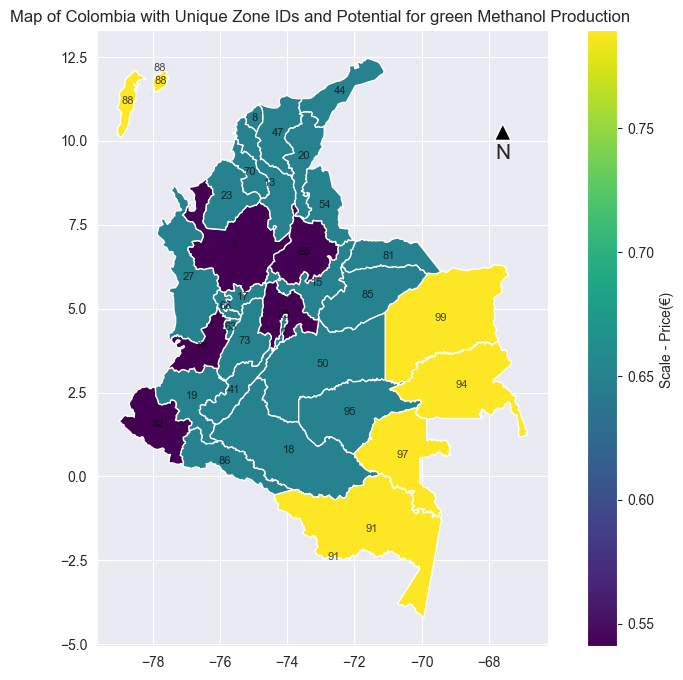

In [29]:

# Assign unique IDs based on the row index
colombia_map['zone_id'] = colombia_map['divipola_n'].astype(str)  # Convert the index to string for labeling
# Plot the map with a color scale from 0 to 10
fig, ax = plt.subplots(figsize=(10, 8))
colombia_map.plot(column='result', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Scale - Price(€) "})


# Add labels for the unique IDs
for idx, row in colombia_map.iterrows():
    # Use the centroid of each shape to place the label
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zone_id'], ha='center', va='center', fontsize=8, color='black', alpha=0.7)

x, y = 0.9, 0.85  # Location of the arrow on the map (in axis coordinates)
ax.annotate('N', xy=(x, y), xytext=(x, y - 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)



ax.set_title("Map of Colombia with Unique Zone IDs and Potential for green Methanol Production ")
plt.savefig("C:/Users/Eduar/Desktop/images_report/Colombian map.png")
plt.show()


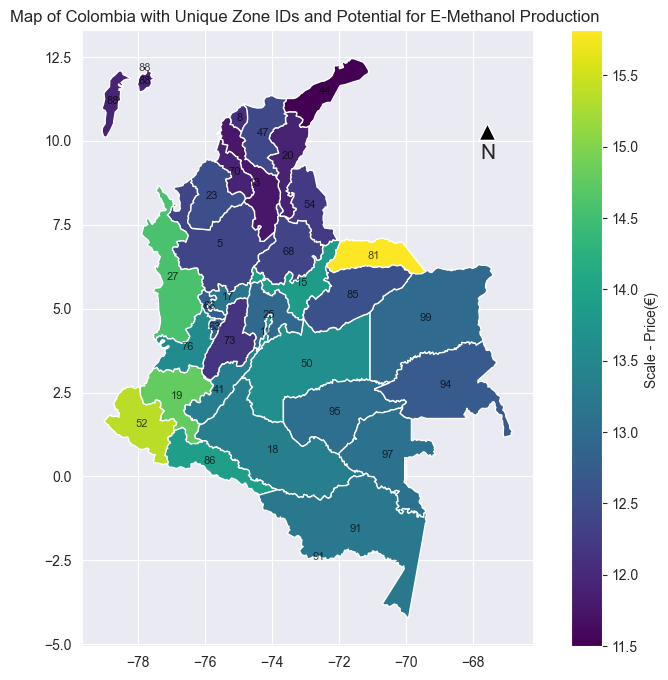

In [30]:
colombia_map['zone_id'] = colombia_map['divipola_n'].astype(str)  # Convert the index to string for labeling
# Plot the map with a color scale from 0 to 10
fig, ax = plt.subplots(figsize=(10, 8))
colombia_map.plot(column='E_Methanol', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Scale - Price(€) "})


# Add labels for the unique IDs
for idx, row in colombia_map.iterrows():
    # Use the centroid of each shape to place the label
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zone_id'], ha='center', va='center', fontsize=8, color='black', alpha=0.7)


x, y = 0.9, 0.85  # Location of the arrow on the map (in axis coordinates)
ax.annotate('N', xy=(x, y), xytext=(x, y - 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)



ax.set_title("Map of Colombia with Unique Zone IDs and Potential for E-Methanol Production ")
plt.savefig("C:/Users/Eduar/Desktop/images_report/Colombian map E_methanol.png")
plt.show()


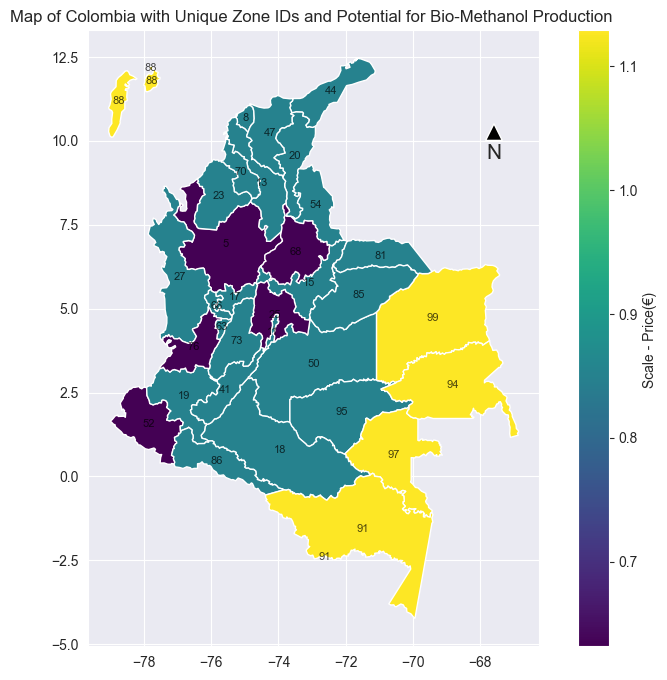

In [31]:
colombia_map['zone_id'] = colombia_map['divipola_n'].astype(str)  # Convert the index to string for labeling
# Plot the map with a color scale from 0 to 10
fig, ax = plt.subplots(figsize=(10, 8))
colombia_map.plot(column='Bio_Methanol', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Scale - Price(€) "})

# Add labels for the unique IDs
for idx, row in colombia_map.iterrows():
    # Use the centroid of each shape to place the label
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zone_id'], ha='center', va='center', fontsize=8, color='black', alpha=0.7)


x, y = 0.9, 0.85  # Location of the arrow on the map (in axis coordinates)
ax.annotate('N', xy=(x, y), xytext=(x, y - 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)



ax.set_title("Map of Colombia with Unique Zone IDs and Potential for Bio-Methanol Production ")
plt.savefig("C:/Users/Eduar/Desktop/images_report/Colombian map Bio_Methanol.png")
plt.show()